# Simulated Annealing Search
**importing required modules & functions:**

In [1]:
import numpy as np
import networkx as nx
import random
import math
from matplotlib import pyplot as plt
import copy
from utils import *

**reading data from excel file:**

In [2]:
adj_matrix = read_from_excel()

**Simulated Annealing Implementation:**

In [3]:
def simulated_annealing(adj_matrix: np.matrix, initial_T):
    current_path = initial_solution(adj_matrix, 3) # details in utils.py
    T = initial_T
    stopping_temperature = 1e-3
    costs = []
    paths = []
    Ts = []
    while True:
        costs.append(compute_cost(adj_matrix, current_path)) # details in utils.py
        Ts.append(T)
        paths.append(current_path)
        T = 0.99*T
        if T < stopping_temperature:
            return paths, costs, current_path, Ts
        
        next_path = random_successor(copy.deepcopy(current_path)) # details in utils.py
        delta_E = compute_cost(adj_matrix, current_path)-compute_cost(adj_matrix, next_path)  
        if delta_E > 0:
            current_path = next_path
        else:
            current_path = next_path if random.random() < math.exp(delta_E/T) else current_path 

In [4]:
paths, costs, final_path, T_list = simulated_annealing(adj_matrix, initial_T=50000)

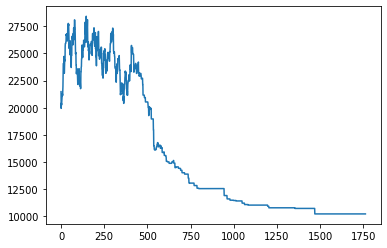

In [5]:
plt.plot(costs)

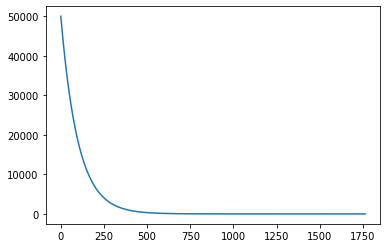

In [6]:
plt.plot(T_list)

In [7]:
cities_list = []
for i in final_path:
    cities_list.append(cities[str(i)])

In [8]:
G = nx.Graph()
nx.add_path(G, cities_list)

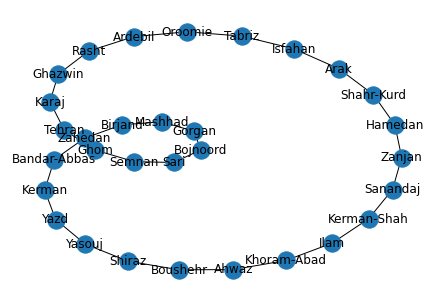

In [10]:
nx.draw(G, with_labels=True)

In [11]:
cities_list

['Isfahan',
 'Arak',
 'Shahr-Kurd',
 'Hamedan',
 'Zanjan',
 'Sanandaj',
 'Kerman-Shah',
 'Ilam',
 'Khoram-Abad',
 'Ahwaz',
 'Boushehr',
 'Shiraz',
 'Yasouj',
 'Yazd',
 'Kerman',
 'Bandar-Abbas',
 'Zahedan',
 'Birjand',
 'Mashhad',
 'Gorgan',
 'Bojnoord',
 'Sari',
 'Semnan',
 'Ghom',
 'Tehran',
 'Karaj',
 'Ghazwin',
 'Rasht',
 'Ardebil',
 'Oroomie',
 'Tabriz',
 'Isfahan']